In [1]:
# Enable PEP8 code checking.
%load_ext pycodestyle_magic

%pycodestyle_on

In [2]:
import football_data_api
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import yaml

from footy.competition import Competition

competition_code = os.environ['FOOTBALL_DATA_API_COMPETITION_CODE']

with open('footy.yml') as stream:
    config_data = yaml.safe_load(stream)

competition_info = config_data['competitions'][competition_code]
competition_name = competition_info['competition_name']

football_data = football_data_api.CompetitionData()
football_data.competition = competition_name
competition = Competition(football_data)

# League Table

In [3]:
model_data = competition.get_model_data()
model_data['table']

,team_name,goals_for,goals_against,home_games,away_games,goal_difference,points,attack_strength,defence_factor
0,CA Mineiro,18,12,4,6,6,21,1.50,1.00
1,SC Internacional,15,7,5,6,8,20,1.25,0.58
2,SE Palmeiras,14,9,4,6,5,18,1.17,0.75
3,São Paulo FC,13,11,6,4,2,18,1.08,0.92
4,CR Vasco da Gama,15,10,5,5,5,17,1.25,0.83
5,CR Flamengo,13,13,4,6,0,17,1.08,1.08
6,Santos FC,14,12,6,5,2,16,1.17,1.00
7,Fortaleza EC,11,9,5,6,2,15,0.92,0.75
8,Fluminense FC,12,14,6,5,-2,14,1.00,1.17
9,SC Recife,11,13,5,6,-2,14,0.92,1.08


# Team Data

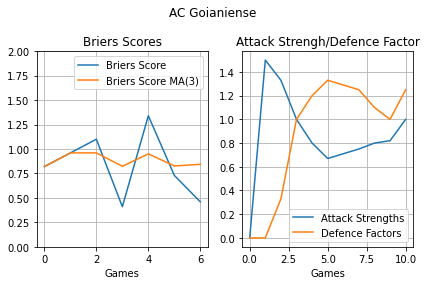

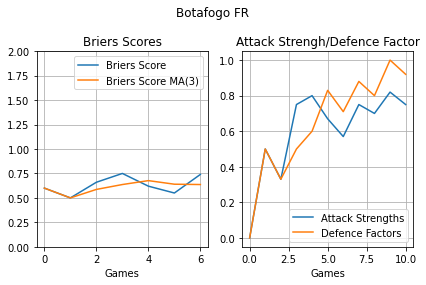

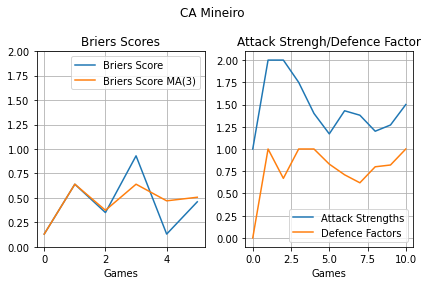

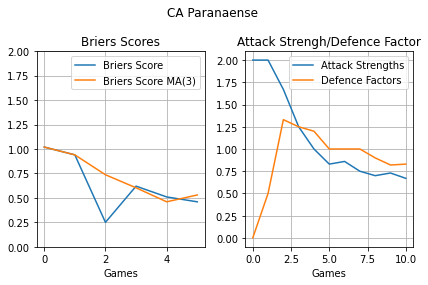

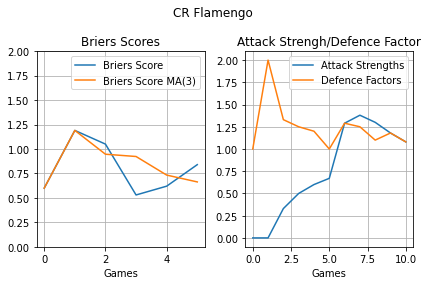

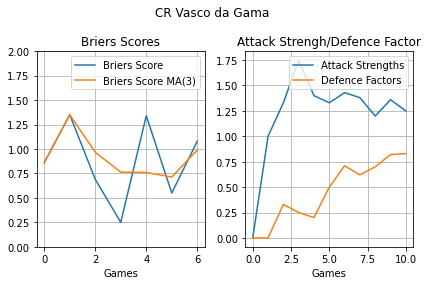

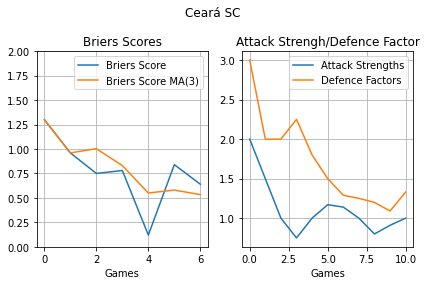

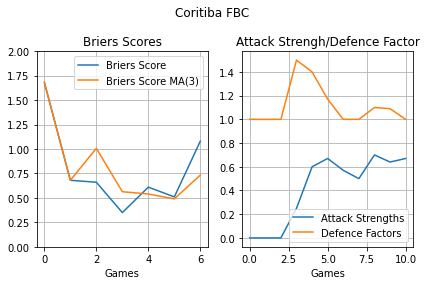

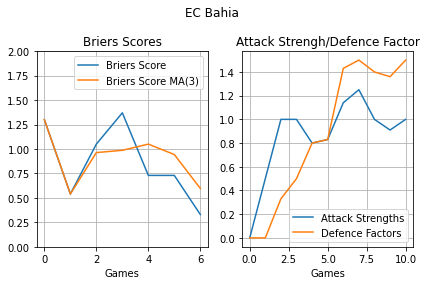

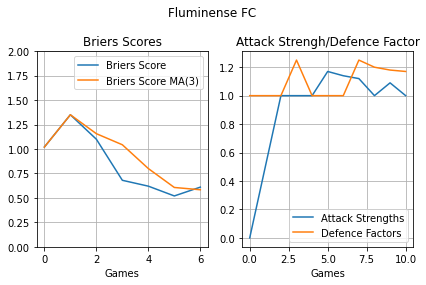

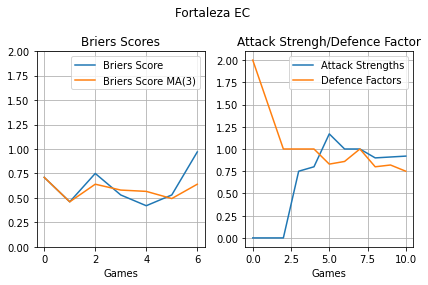

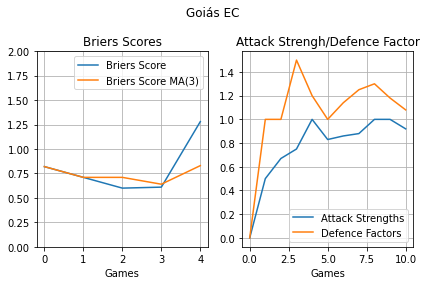

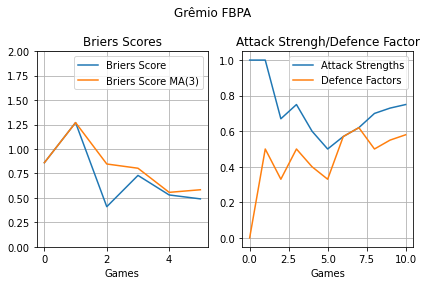

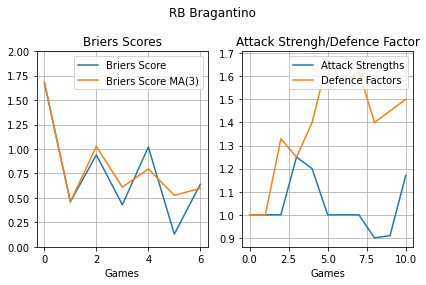

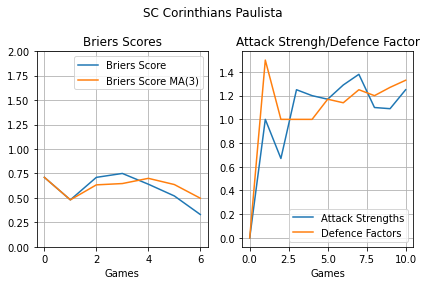

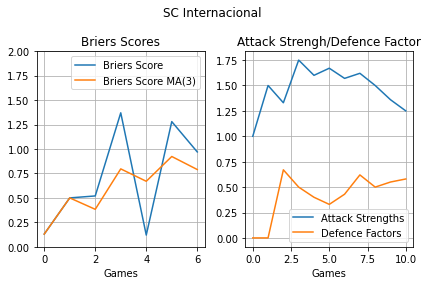

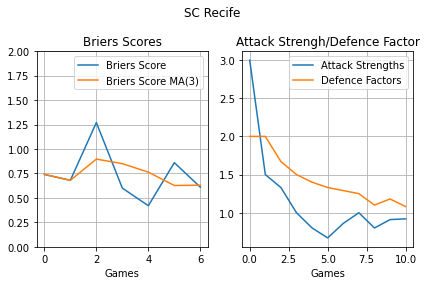

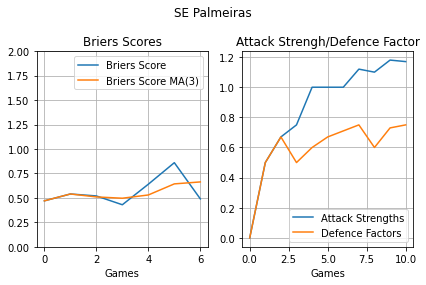

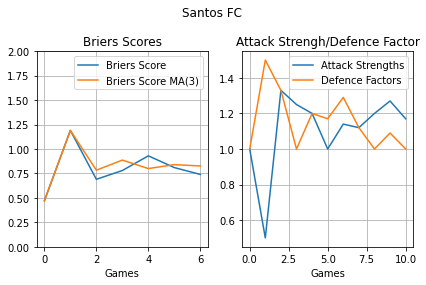

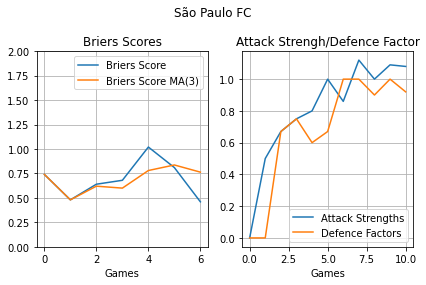

In [11]:
teams_data = model_data['teams']


def moving_average(x, w=3):
    a = (np.convolve(x, np.ones(w), 'valid') / w).tolist()
    return x.tolist()[0:w - 1] + a


for team_name in teams_data.keys():
    team_data = teams_data[team_name]
    briers_scores = team_data['briers_scores']
    briers_scores_outcomes = np.array(briers_scores['outcomes'])

    if len(briers_scores_outcomes) >= 3:
        briers_scores_outcomes_ma3 = moving_average(briers_scores_outcomes)
    else:
        briers_scores_outcomes_ma3 = None

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(team_name)
    ax1.plot(briers_scores_outcomes, label='Briers Score')

    if briers_scores_outcomes_ma3 is not None:
        ax1.plot(briers_scores_outcomes_ma3, label='Briers Score MA(3)')
    ax1.legend()
    ax1.set_ylim(0.0, 2.0)
    ax1.set(xlabel='Games', title='Briers Scores')
    ax1.grid()

    attack_strengths = team_data['attack_strengths']
    defence_factors = team_data['defence_factors']
    ax2.plot(attack_strengths, label='Attack Strengths')
    ax2.plot(defence_factors, label='Defence Factors')
    ax2.legend()
    ax2.set(xlabel='Games', title='Attack Strengh/Defence Factor')
    ax2.grid()

    plt.tight_layout()

    plt.show()

# Upcoming Fixtures

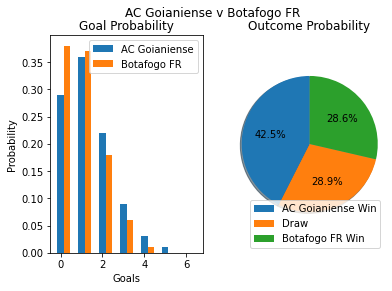

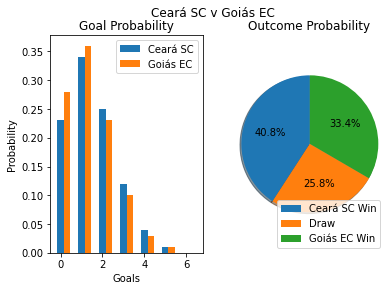

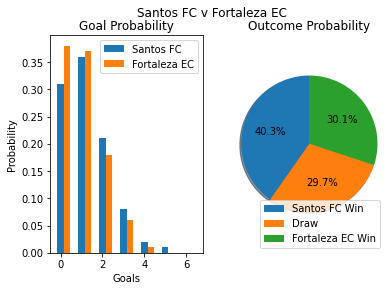

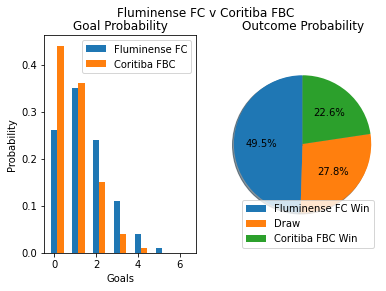

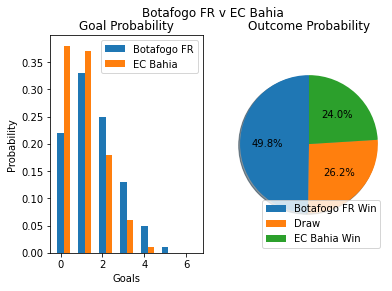

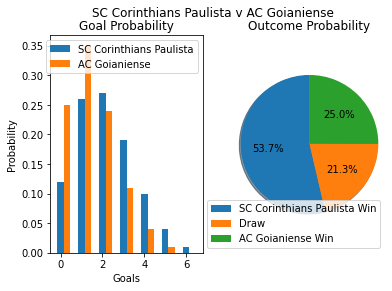

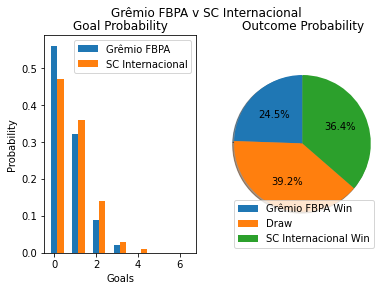

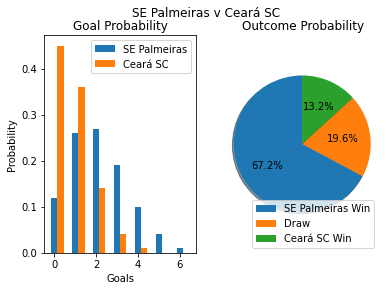

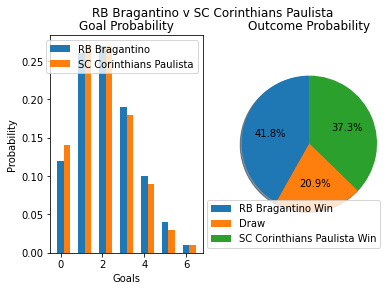

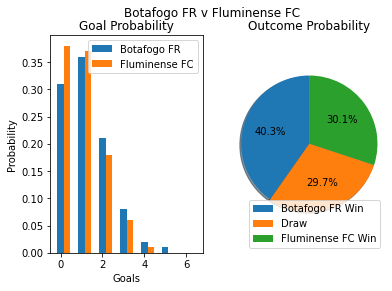

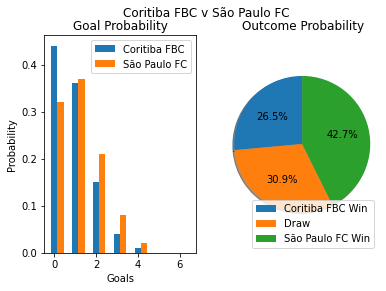

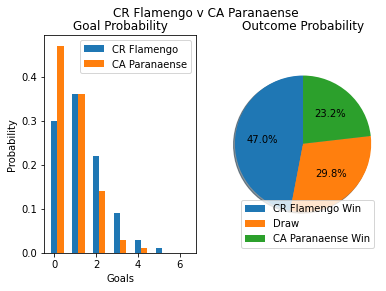

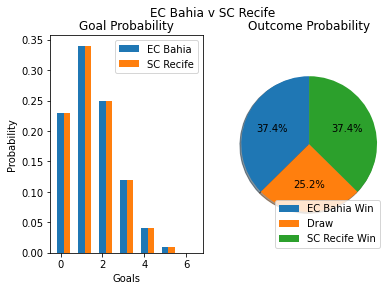

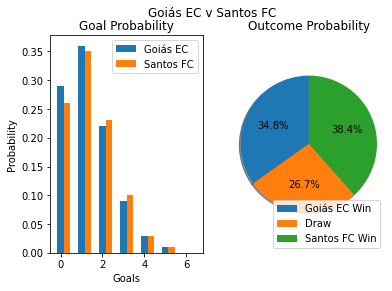

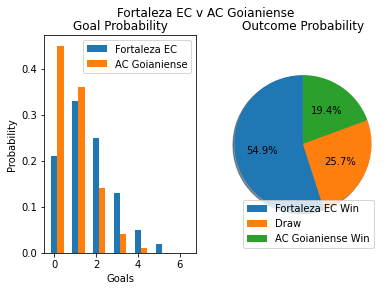

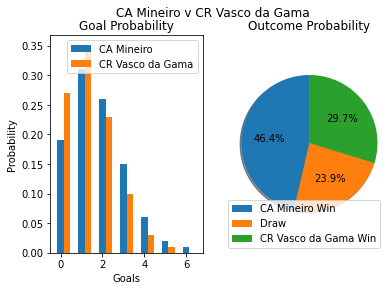

In [30]:
for fixture in model_data['upcoming_fixtures']:
    home_team = fixture['home_team']
    away_team = fixture['away_team']
    utc_timestamp = fixture['utc_timestamp']

    if 'outcome_probabilities' in fixture:
        final_score_probabilities = fixture['final_score_probabilities']
        outcome_probabilities = fixture['outcome_probabilities']
        away_team_goals_probability = fixture['away_team_goals_probability']
        home_team_goals_probability = fixture['home_team_goals_probability']
    else:
        outcome_probabilities = None

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(f'{home_team} v {away_team}')

    if outcome_probabilities is not None:
        width = 0.3
        ax1.bar(np.arange(len(home_team_goals_probability)),
                home_team_goals_probability, width=width, label=home_team)
        ax1.bar(np.arange(len(away_team_goals_probability)) + width,
                away_team_goals_probability, width=width, label=away_team)
        ax1.set(xlabel='Goals', ylabel='Probability', title='Goal Probability')
        ax1.legend()

        labels = [f'{home_team} Win', 'Draw', f'{away_team} Win']
        ax2.pie(outcome_probabilities, labels=labels, autopct='%1.1f%%',
                shadow=True, startangle=90, labeldistance=None)
        ax2.legend(loc="lower right")
        # Equal aspect ratio ensures that pie is drawn as a circle.
        ax2.axis('equal')
        ax2.set(title='Outcome Probability')

    plt.show()